# ***HOTEL RECOMMENDER SYSTEM***

In [19]:
import pandas as pd
import numpy as np

# uploading dataset 
data = pd.read_csv('D:/personal/SDP/New folder/7282_1.csv', error_bad_lines=False)
system = data.copy()
print(system.columns)
print(system.shape)

C:\Users\HP\AppData\Local\Temp\ipykernel_25528\1161332662.py:5: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv('D:/personal/SDP/New folder/7282_1.csv', error_bad_lines=False)


Index(['address', 'categories', 'city', 'country', 'latitude', 'longitude',
       'name', 'postalCode', 'province', 'reviews.date', 'reviews.dateAdded',
       'reviews.doRecommend', 'reviews.id', 'reviews.rating', 'reviews.text',
       'reviews.title', 'reviews.userCity', 'reviews.username',
       'reviews.userProvince'],
      dtype='object')
(35912, 19)


***Preprocessing***

In [20]:
#checking for null values
system.isnull().sum()

address                     0
categories                  0
city                        0
country                     0
latitude                   86
longitude                  86
name                        0
postalCode                 55
province                    0
reviews.date              259
reviews.dateAdded           0
reviews.doRecommend     35912
reviews.id              35912
reviews.rating            862
reviews.text               22
reviews.title            1622
reviews.userCity        19649
reviews.username           43
reviews.userProvince    18394
dtype: int64

In [21]:
# filling null values
system.fillna(method='ffill', inplace=True)

In [22]:
system.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35912 entries, 0 to 35911
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   address               35912 non-null  object 
 1   categories            35912 non-null  object 
 2   city                  35912 non-null  object 
 3   country               35912 non-null  object 
 4   latitude              35912 non-null  float64
 5   longitude             35912 non-null  float64
 6   name                  35912 non-null  object 
 7   postalCode            35912 non-null  object 
 8   province              35912 non-null  object 
 9   reviews.date          35912 non-null  object 
 10  reviews.dateAdded     35912 non-null  object 
 11  reviews.doRecommend   0 non-null      float64
 12  reviews.id            0 non-null      float64
 13  reviews.rating        35912 non-null  float64
 14  reviews.text          35912 non-null  object 
 15  reviews.title      

In [23]:
system.nunique()

address                   999
categories                396
city                      761
country                     1
latitude                  982
longitude                 983
name                      879
postalCode                911
province                  287
reviews.date             3009
reviews.dateAdded        1029
reviews.doRecommend         0
reviews.id                  0
reviews.rating             43
reviews.text            34397
reviews.title           21961
reviews.userCity         2897
reviews.username        15492
reviews.userProvince      648
dtype: int64

In [24]:
# checking for duplicate values
system.duplicated().sum()

4

In [25]:
# getting rid of duplicate values
system.drop_duplicates(inplace=True)

In [26]:
# LABEL ENCODING
from sklearn import preprocessing
unique_cols = ['reviews.username']
encode = preprocessing.LabelEncoder()
for i in unique_cols:
    system[i] = encode.fit_transform(system[i])
print(system.shape)

(35908, 19)


C:\Users\HP\AppData\Local\Temp\ipykernel_25528\3447217820.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(system.corr(), annot = True)


<AxesSubplot: >

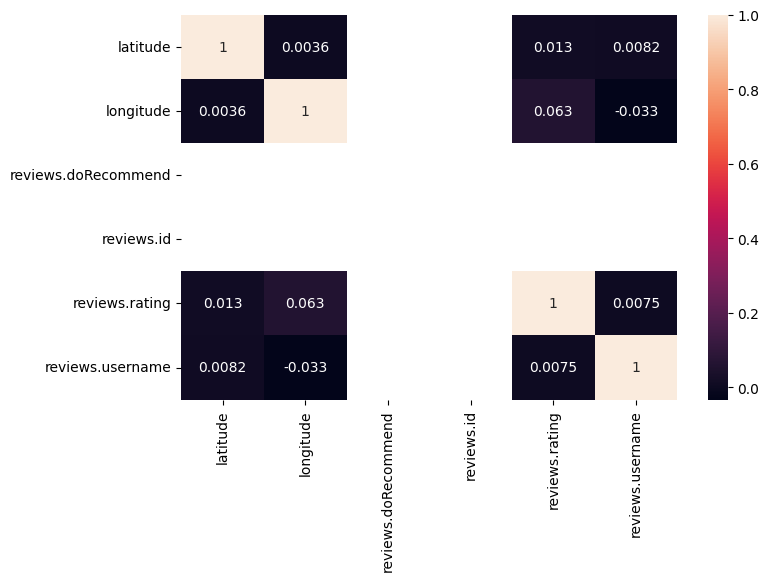

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
sns.heatmap(system.corr(), annot = True)

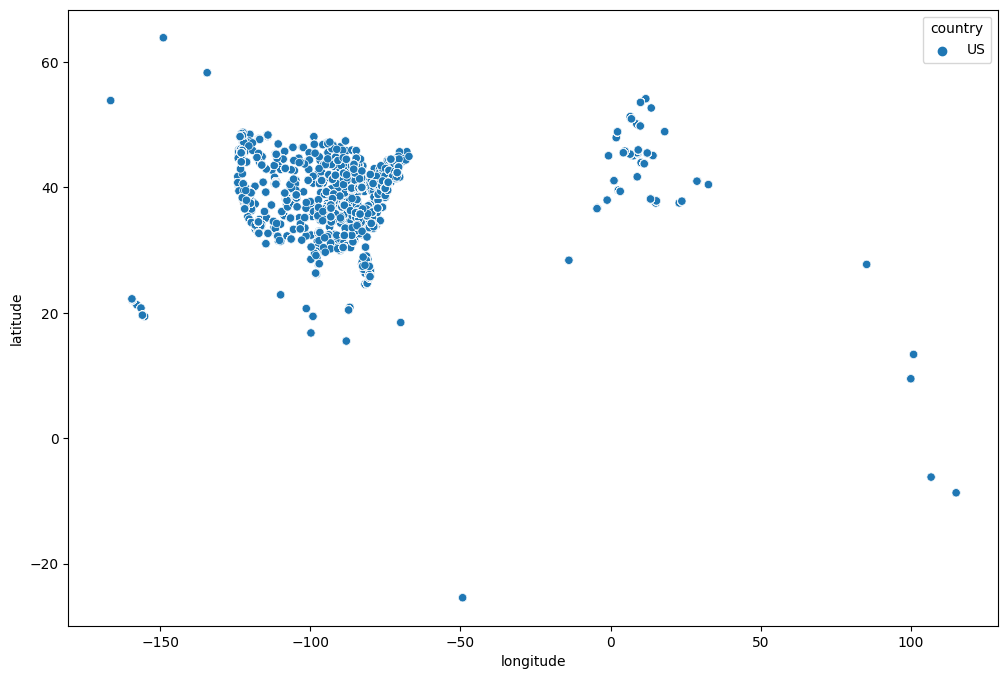

In [16]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=system.longitude,y=system.latitude,hue=system.country)
plt.show()

In [17]:
pip install folium

     ---------------------------------------- 0.0/102.3 kB ? eta -:--:--
     ----------------------------------- --- 92.2/102.3 kB 5.1 MB/s eta 0:00:01
     -------------------------------------- 102.3/102.3 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 23.1
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [18]:
import folium
from folium.plugins import MarkerCluster
from folium import plugins
from folium.plugins import FastMarkerCluster

Long=95.7129
Lat=37.0902
locations = list(zip(system.latitude, system.longitude))

map_us = folium.Map(location=[Lat,Long], zoom_start=10)
FastMarkerCluster(data=locations).add_to(map_us)
map_us

In [10]:
# DROPING UNNECESSARY COLUMNS FROM THE SYSTEM DATAFRAME
system = system[['name', 'reviews.rating', 'reviews.username']]
# FINDING NO OF RATINGS PUT FORWARD BY DIFFERENT USERS
rating = system.groupby('reviews.username')['reviews.rating'].count().reset_index()
rating.rename(columns={'reviews.rating': 'no_of_ratings'}, inplace=True)
rating = rating[rating['no_of_ratings'] >= 5]
print(rating.shape)
# MERGING THE NEW DATAFRAME WITH THE OLD SYSTEM DATAFRAME
final_ratings = rating.merge(system, on='reviews.username')
print(final_ratings.shape)
print(final_ratings.head())

(589, 2)
(17507, 4)
   reviews.username  no_of_ratings                              name  \
0               355             27              The Houstonian Hotel   
1               355             27                    Super 8 Ithaca   
2               355             27                Days Inn Brookings   
3               355             27  La Quinta Inn and Suites Sunrise   
4               355             27                            Ramada   

   reviews.rating  
0             3.0  
1             1.0  
2             3.0  
3             4.0  
4             4.0  


In [11]:
# USING PIVOT TABLE
hotel_pivot = final_ratings.pivot_table(columns='reviews.username', index='name', values='reviews.rating')
hotel_pivot

reviews.username,355,367,372,443,458,495,526,558,567,580,...,14910,14918,14922,14964,15097,15277,15354,15380,15415,15430
name,,,,,,,,,,,,,,,,,,,,,
1785 Inn,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1900 House,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
A Bed & Breakfast In Cambridge,NaN,2.923077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A Swallow's Nest Motel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
Abbeville Inn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wingate By Wyndham Chantilly / Dulles Airport,NaN,4.333333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wingate By Wyndham Lagrange,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Wingate By Wyndham Pueblo,5.0,4.321429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# REPLACING NAN VALUES WITH 0
hotel_pivot.fillna(0, inplace=True)

In [13]:
# covertion to csr matrix
from scipy.sparse import csr_matrix
hotel_sparse=csr_matrix(hotel_pivot)

In [14]:
type(hotel_sparse)

scipy.sparse._csr.csr_matrix

In [15]:
# USING NEAREST NEIGHBOUR ALGORITHM 
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')

In [16]:
model.fit(hotel_sparse)

NearestNeighbors(algorithm='brute')

In [19]:
choice = np.where(hotel_pivot.index=='Days Inn El Reno Ok')[0][0]

In [20]:
distances, suggestions = model.kneighbors(hotel_pivot.iloc[int(choice), :].values.reshape(1, -1), n_neighbors=6)
distances

array([[0.        , 5.31013473, 5.49900103, 6.02873776, 6.02873776,
        6.02873776]])

In [21]:
suggestions

array([[159, 625, 537, 472, 471, 468]], dtype=int64)

In [22]:
for i in range(len(suggestions)):
  print(hotel_pivot.index[suggestions[i]])
%store hotel_pivot

Index(['Days Inn El Reno Ok', 'The Grove Seaside Hotel', 'Rodeway Inn',
       'P K Motel', 'Olde Bridge Inn', 'Noyo Harbor Inn'],
      dtype='object', name='name')
Stored 'hotel_pivot' (DataFrame)


In [22]:
import tkinter as tk
import numpy as np

def recommend(hotel_name):
    choice = np.where(hotel_pivot.index==hotel_name)[0]
    distances, suggestions = model.kneighbors(hotel_pivot.iloc[int(choice), :].values.reshape(1, -1), n_neighbors=6)
    for i in range(len(suggestions)):
        suggestion = hotel_pivot.index[suggestions[i]]
    recommendations = suggestion
    return recommendations

# Define function to handle button click event
def handle_click():
    # Get the hotel name from the input field
    hotel_name = input_field.get()
    # Call the recommend function to get recommendations
    recommendations = recommend(hotel_name)
    # Clear the output field
    output_field.delete(0, tk.END)
    # Display the recommendations in the output field
    for recommendation in recommendations:
        output_field.insert(tk.END, recommendation)

# Create a new tkinter window
window = tk.Tk()

# Set the window title
window.title('Hotel Recommender')

# Set the window size
window.geometry('400x300')

# Create a label for the input field
input_label = tk.Label(window, text='Enter Hotel Name:')
input_label.pack()

# Create an input field for the hotel name
input_field = tk.Entry(window, width=50)
input_field.pack()

# Create a button to trigger the recommendation function
recommend_button = tk.Button(window, text='Get Recommendations', command=handle_click)
recommend_button.pack()

# Create a label for the output field
output_label = tk.Label(window, text='Recommended Hotels:')
output_label.pack()

# Create an output field for the recommendations
output_field = tk.Listbox(window, width=50, height=10)
output_field.pack()

# Start the tkinter event loop
window.mainloop()
